In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [71]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [72]:
df.shape

(8555, 3)

In [73]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [74]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


## Encoding 

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [77]:
df['Gender']=le.fit_transform(df.Gender)
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


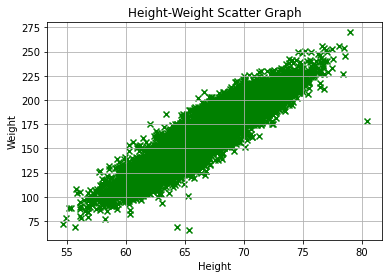

In [78]:
plt.scatter(df.Height,df.Weight, marker='x',color='green')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Scatter Graph')
plt.grid()

## Seperate x and y 

In [79]:
x=df.drop(df[['Weight']],axis=1)
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [80]:
y=df[['Weight']]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


## Train = 70%, Test = 30%

In [81]:
from sklearn.model_selection import train_test_split as tts

In [82]:
x_train,x_test,y_train,y_test=tts(x,y, test_size=0.30, random_state=42)

## Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lreg=LinearRegression()

## Train

In [85]:
lreg.fit(x_train,y_train)

LinearRegression()

## Test/ Prediction

In [86]:
pred=lreg.predict(x_test)
pred

array([[142.44868114],
       [186.0517281 ],
       [198.42283706],
       ...,
       [102.94080643],
       [190.83713617],
       [143.34786753]])

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [88]:
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
print("mean_squared_error \"MSE:\"",mse)
print("mean_absolute_error \"MAE:\"",mae)
print("r2_score:",r2)

mean_squared_error "MSE:" 96.83734437830606
mean_absolute_error "MAE:" 7.870097130738319
r2_score: 0.905911242442266


## Apply KNN Regressor:

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
knn=KNeighborsRegressor(n_neighbors=7)

In [91]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [92]:
knn_pred=knn.predict(x_test)
knn_pred

array([[140.8521836 ],
       [182.14029877],
       [193.22718216],
       ...,
       [102.38526671],
       [192.24964913],
       [146.03776666]])

In [93]:
knn_mse=mean_squared_error(y_test,knn_pred)
knn_mae=mean_absolute_error(y_test,knn_pred)
knn_r2=r2_score(y_test,knn_pred)
print("KNN_mean_squared_error \"MSE:\"",knn_mse)
print("KNN_mean_absolute_error \"MAE:\"",knn_mae)
print("KNN_r2_score:",knn_r2)

KNN_mean_squared_error "MSE:" 114.90022152557422
KNN_mean_absolute_error "MAE:" 8.54171241233402
KNN_r2_score: 0.8883610537251414


In [94]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_pred
knn_mse=mean_squared_error(y_test,knn_pred)
knn_mae=mean_absolute_error(y_test,knn_pred)
knn_r2=r2_score(y_test,knn_pred)
print("KNN_mean_squared_error \"MSE:\"",knn_mse)
print("KNN_mean_absolute_error \"MAE:\"",knn_mae)
print("KNN_r2_score:",knn_r2)

KNN_mean_squared_error "MSE:" 114.90022152557422
KNN_mean_absolute_error "MAE:" 8.54171241233402
KNN_r2_score: 0.8883610537251414


In [95]:
lreg.score(x_train,y_train)

0.8973793060969246

In [96]:
lreg.score(x_test,y_test)

0.905911242442266

In [97]:
knn.score(x_train,y_train)

0.9108960969861895

In [98]:
knn.score(x_test,y_test)

0.8883610537251414

#### Conclusion: So, We can dicide by above 2 regressor (LinearRegressor & KNN Regressor) that, for The Continous value best result getting from LinearRegressor 

## Apply KNN Regressor on Breast Cancer data Sheet

In [99]:
cancer_df=pd.read_csv("Breast Cancer.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [100]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [101]:
cancer_df=cancer_df.drop(cancer_df[['id']],axis=1)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
cancer_df=cancer_df.drop(cancer_df[['Unnamed: 32']],axis=1)
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
cancer_df.shape

(569, 31)

In [104]:
cancer_df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [105]:
##radius_mean,texture_mean,perimeter_mean,area_mean,texture_se,perimeter_se,area_se,
##radius_worst,texture_worst,perimeter_worst,area_worst,

In [106]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [107]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [108]:
cancer_df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [109]:
cancer_df.iloc[0:,10:21]

,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...
564,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


### Encoding 

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
cancer_df['diagnosis']=le.fit_transform(cancer_df['diagnosis'])
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scaling

In [112]:
# Scaling need for the feature of:--> radius_mean,texture_mean,perimeter_mean,area_mean,
# texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst

<AxesSubplot:>

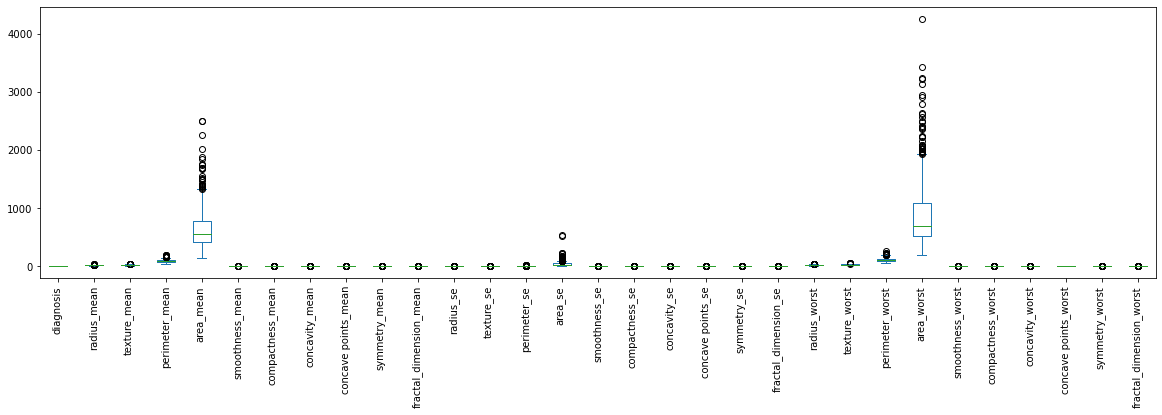

In [113]:
cancer_df.plot.box(figsize=(20,5), rot=90)

In [114]:
from sklearn.preprocessing import MinMaxScaler
mmxscaler = MinMaxScaler()

In [115]:
import warnings
warnings.filterwarnings('ignore')
colls=[['radius_mean','texture_mean','perimeter_mean','area_mean','texture_se','perimeter_se','area_se','radius_worst','texture_worst','perimeter_worst','area_worst']]
for col in colls:
        cancer_df[col]=mmxscaler.fit_transform(cancer_df[col])
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:>

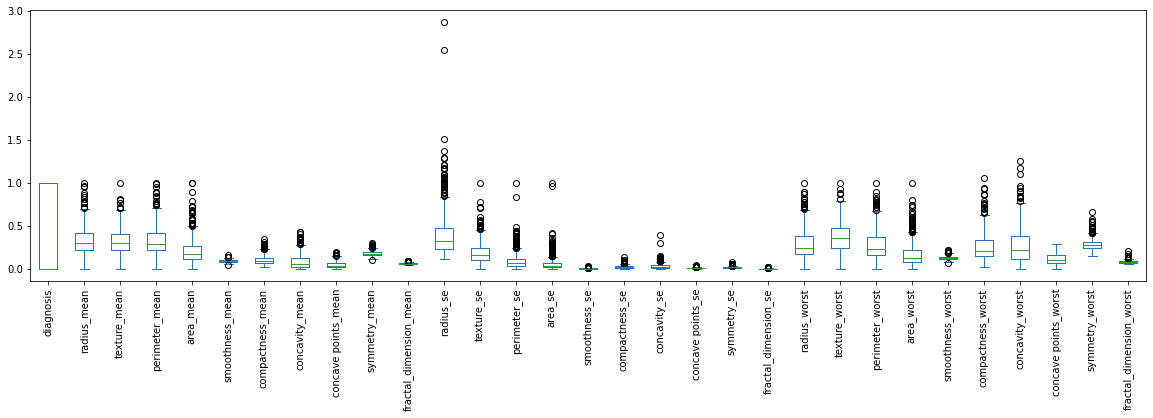

In [116]:
cancer_df.plot.box(figsize=(20,5), rot=90)

In [117]:
x=cancer_df.drop(cancer_df[['diagnosis']],axis=1)
y=cancer_df[['diagnosis']]
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [118]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


## Train = 70%, Test = 30%

In [119]:
from sklearn.model_selection import train_test_split as tts

In [120]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.30,random_state=42)

## Apply KNN Classifier

In [121]:
from sklearn.neighbors import KNeighborsRegressor

model=KNeighborsRegressor(n_neighbors=7)
model.fit(xtrain,ytrain)
model_pred=model.predict(xtest)
model_pred

array([[0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.85714286],
       [0.57142857],
       [0.        ],
       [0.14285714],
       [0.85714286],
       [0.        ],
       [0.85714286],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.14285714],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.14285714],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.14285714],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.14285714],
       [0.        ],
       [0.        ],
       [0.   

In [125]:
model_mse=mean_squared_error(ytest,model_pred)
model_mae=mean_absolute_error(ytest,model_pred)
model_r2=r2_score(ytest,model_pred)
print("mean_squared_error \"MSE:\"",model_mse)
print("mean_absolute_error \"MAE:\"",model_mae)
print("r2_score:",model_r2)

mean_squared_error "MSE:" 0.02482396467358873
mean_absolute_error "MAE:" 0.05513784461152883
r2_score: 0.8933160565813627


## Apply DecisionTreeClassifier

In [126]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,precision_score,recall_score,f1_score,auc
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtc = DecisionTreeClassifier()
dtc.fit(x,y)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [128]:
dtc_pred=dtc.predict(xtest)
dtc_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [129]:
np.array(ytest)

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
    

## Confusion Matrix

In [130]:
print(classification_report(ytest,dtc_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       108
           1       0.88      0.92      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



In [131]:
con_matrix=confusion_matrix(ytest,dtc_pred)
con_matrix

array([[100,   8],
       [  5,  58]], dtype=int64)

### Accuracy

In [132]:
accuracy_score(ytest,dtc_pred)

0.9239766081871345

In [133]:
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve,roc_auc_score

In [134]:
auc = roc_auc_score(ytest, dtc_pred)
auc

0.9232804232804233

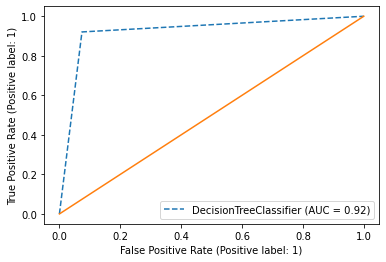

In [135]:
plot_roc_curve(dtc,xtest,ytest,linestyle='--')
plt.plot([0,1],[0,1])

#### Conclusion: So, We can dicide by above 2 Classifier (KNN Regressor & DecisionTreeClassifier) that, for This Categorical value best result getting from DecisionTreeClassifier. 